### データ解析
- ライブラリで用意しているテストデータを解析しましょう
- 機械学習で使用する```scikit-learn```ライブラリには様々なサンプルデータが用意されている
    - 今回は「アヤメデータ」を使用する
        - このデータは```seaborn```ライブラリにも用意されている

### アヤメデータ
- 「がくの長さ」「がくの幅」「花びらの長さ」「花びらの長さ」「花びらの幅」「アヤメの種類」の5次元データ
    - データの次元: データのカテゴリ数のこと
- seabornでアヤメデータを使用する場合，以下のように書けば良い
```python
import seaborn as sns
sns.load_dataset('iris')
``` 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- ```sepal_length```: がくの長さ
- ```sepal_width```: がくの幅 
- ```petal_length```: 花びらの長さ 
- ```petal_width```: 花びらの幅
- ```species```: アヤメの種類（以下の3種類）
    - ```setosa```: セトサ
    - ```versicolor```: バージカラー
    - ```versinica```: バージニカ
- ```sepal_length```，```sepal_width```，```petal_length```，```petal_width```の4つの値から，どの```species```を求める
- まずは，```sepal_length```，```sepal_width```，```petal_length```，```petal_width```から相関係数を求める

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('iris')
# sepal_length, sepal_width, petal_length, petal_widthを取り出す（species部分を消す）
df2 = df.drop(['species'], axis=1)
df2.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


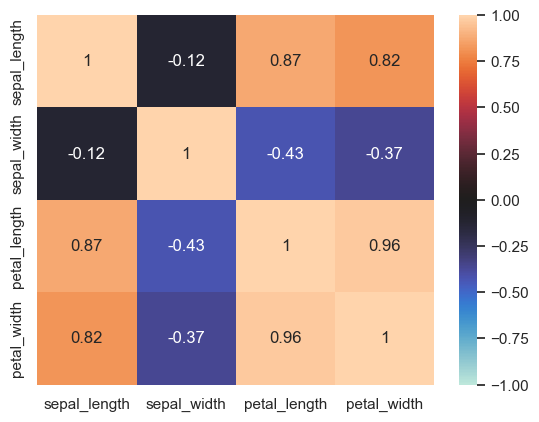

In [3]:
# 相関係数行列をヒートマップで表示する
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
df = sns.load_dataset('iris')
# sepal_length, sepal_width, petal_length, petal_widthを取り出す（species部分を消す）
df2 = df.drop(['species'], axis=1)

# 相関係数は-1以上，1以下の値となる
sns.heatmap(df2.corr(), annot=True, vmax=1, vmin=-1, center=0)
plt.show()

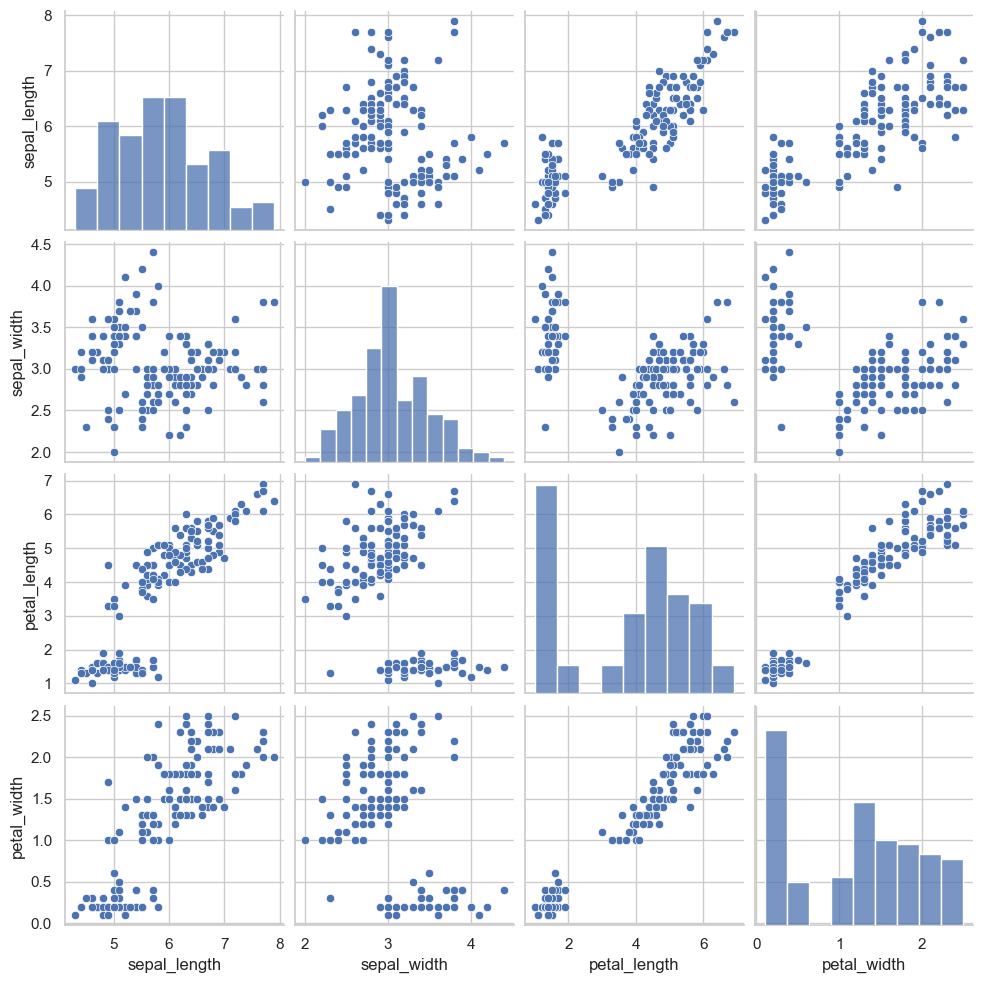

In [4]:
# 相関係数行列をヒートマップで表示する
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
df = sns.load_dataset('iris')
# sepal_length, sepal_width, petal_length, petal_widthを取り出す（species部分を消す）
df2 = df.drop(['species'], axis=1)

sns.pairplot(data=df2)
plt.show()

- この結果から2つの塊であることが推測できる

In [5]:
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


### データ値の把握
- ある列で使われている値の種類を把握したい場合，```df['列名'].unique()```とする．

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
df = sns.load_dataset('iris')

# speciesに使用されている値を把握する
df['species'].unique()

# 'setosa', 'versicolor', 'virginica'の3つであることがわかる

array(['setosa', 'versicolor', 'virginica'], dtype=object)

- ```データフレーム変数 =  データフレーム変数[条件]```で条件を満たすデータだけを抽出できる
    - つまり， ```df[df['species'] == 'setosa']```とすることで，speciesがsetosaのデータだけを抽出できる

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
df = sns.load_dataset('iris')

df3 = df[df['species'] == 'setosa']

df3.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


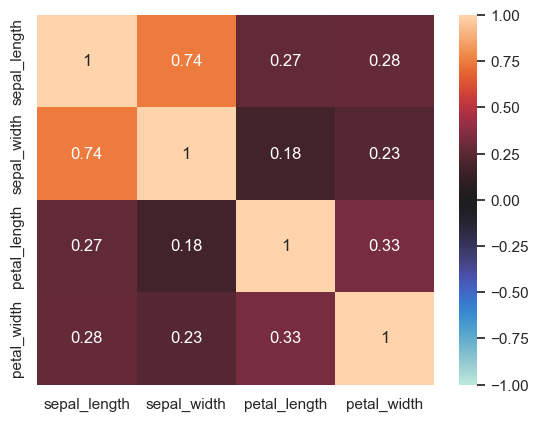

In [8]:
# setosaのデータだけを解析する
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
df = sns.load_dataset('iris')

df3 = df[df['species'] == 'setosa']
# sepal_length, sepal_width, petal_length, petal_widthを取り出す（species部分を消す）
df4 = df3.drop(['species'], axis=1)

# 相関係数は-1以上，1以下の値となる
sns.heatmap(df4.corr(), annot=True, vmax=1, vmin=-1, center=0)
plt.show()

- ヒートマップの結果から，setosaはsepal_length, sepal_widthの関係性が特に強いことがわかる

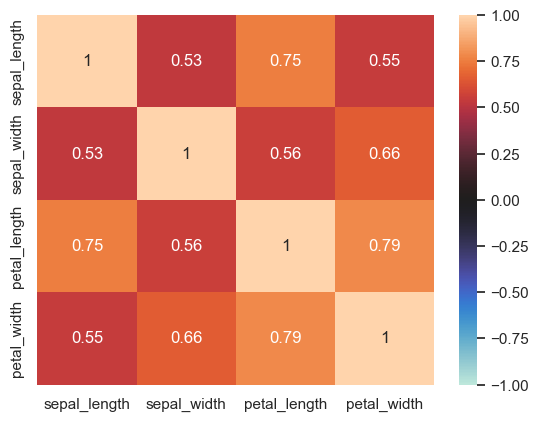

In [9]:
# versicolorのデータだけを解析する
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
df = sns.load_dataset('iris')

df3 = df[df['species'] == 'versicolor']
# sepal_length, sepal_width, petal_length, petal_widthを取り出す（species部分を消す）
df4 = df3.drop(['species'], axis=1)

# 相関係数は-1以上，1以下の値となる
sns.heatmap(df4.corr(), annot=True, vmax=1, vmin=-1, center=0)
plt.show()

- ヒートマップの結果から，versicolorはどの要素の関係性も強いことがわかる

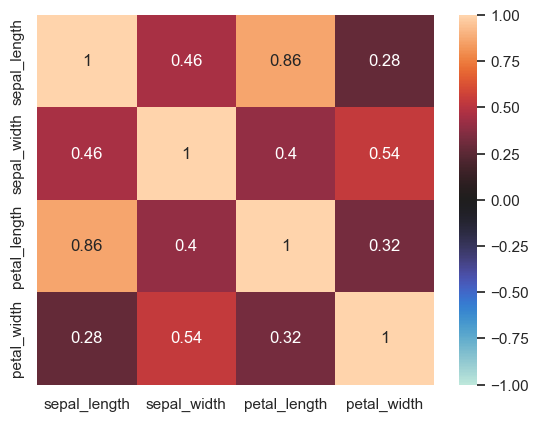

In [10]:
# virginicaのデータだけを解析する
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
df = sns.load_dataset('iris')

df3 = df[df['species'] == 'virginica']
# sepal_length, sepal_width, petal_length, petal_widthを取り出す（species部分を消す）
df4 = df3.drop(['species'], axis=1)

# 相関係数は-1以上，1以下の値となる
sns.heatmap(df4.corr(), annot=True, vmax=1, vmin=-1, center=0)
plt.show()

- ヒートマップの結果から，virginicaはsepal_length, petal_lengthの関係性が特に強いことがわかる

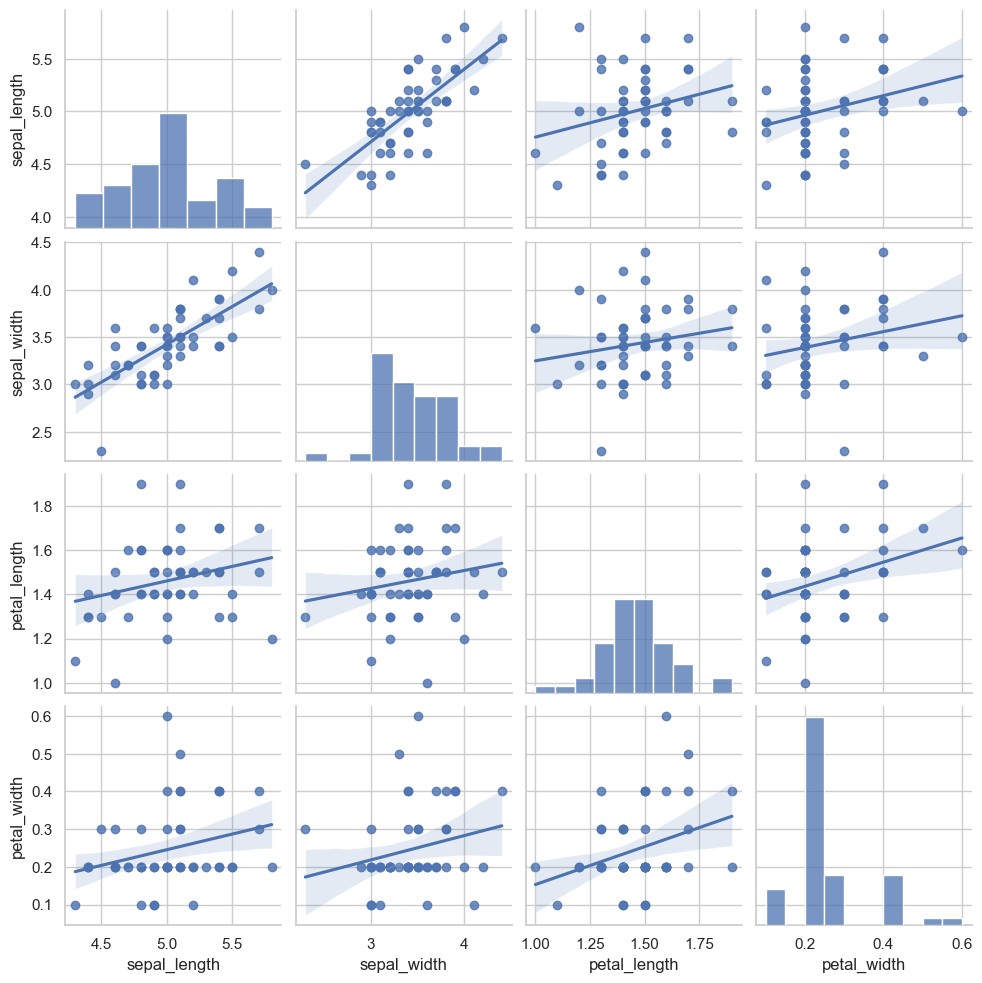

In [11]:
# setosaのデータだけを解析する
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
df = sns.load_dataset('iris')

df3 = df[df['species'] == 'setosa']
# sepal_length, sepal_width, petal_length, petal_widthを取り出す（species部分を消す）
df4 = df3.drop(['species'], axis=1)

# 回帰直線も出力を表示
sns.pairplot(data=df4, kind='reg')
plt.show()

# 信頼領域の狭さで関係性がわかる

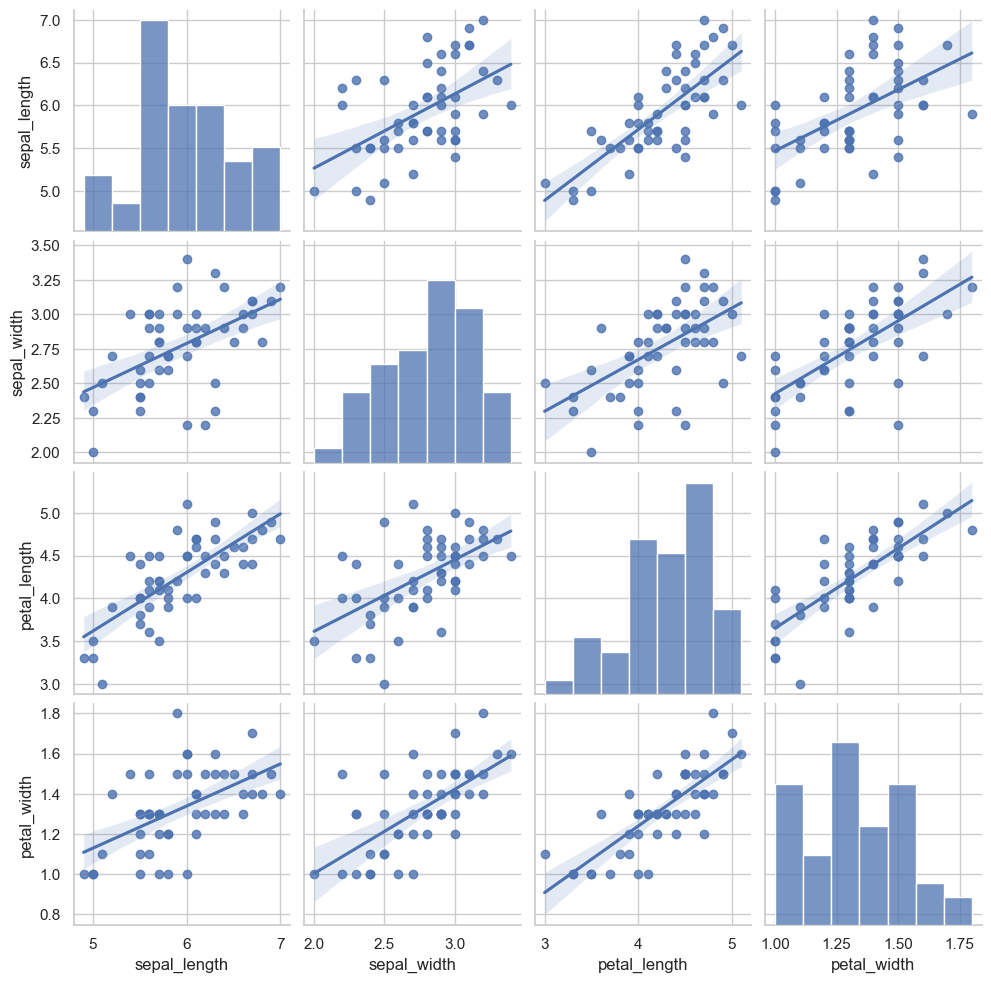

In [12]:
# versicolorのデータだけを解析する
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
df = sns.load_dataset('iris')

df3 = df[df['species'] == 'versicolor']
# sepal_length, sepal_width, petal_length, petal_widthを取り出す（species部分を消す）
df4 = df3.drop(['species'], axis=1)

# 回帰直線も出力を表示
sns.pairplot(data=df4, kind='reg')
plt.show()

# 信頼領域の狭さで関係性がわかる

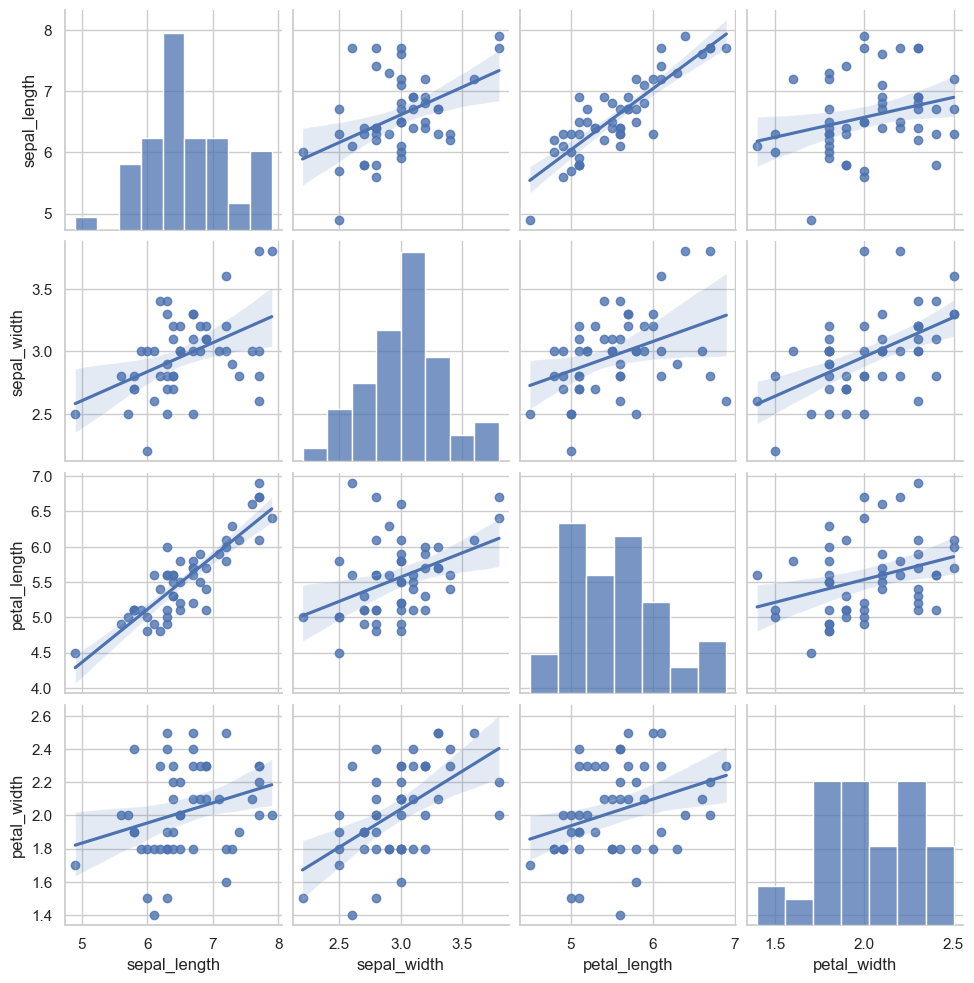

In [13]:
# virginicaのデータだけを解析する
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
df = sns.load_dataset('iris')

df3 = df[df['species'] == 'virginica']
# sepal_length, sepal_width, petal_length, petal_widthを取り出す（species部分を消す）
df4 = df3.drop(['species'], axis=1)

# 回帰直線も出力を表示
sns.pairplot(data=df4, kind='reg')
plt.show()

# 信頼領域の狭さで関係性がわかる

- ある列の値だけで分類したい場合，```sns.pairplot(data=データ, hue='列名')```とすればよい

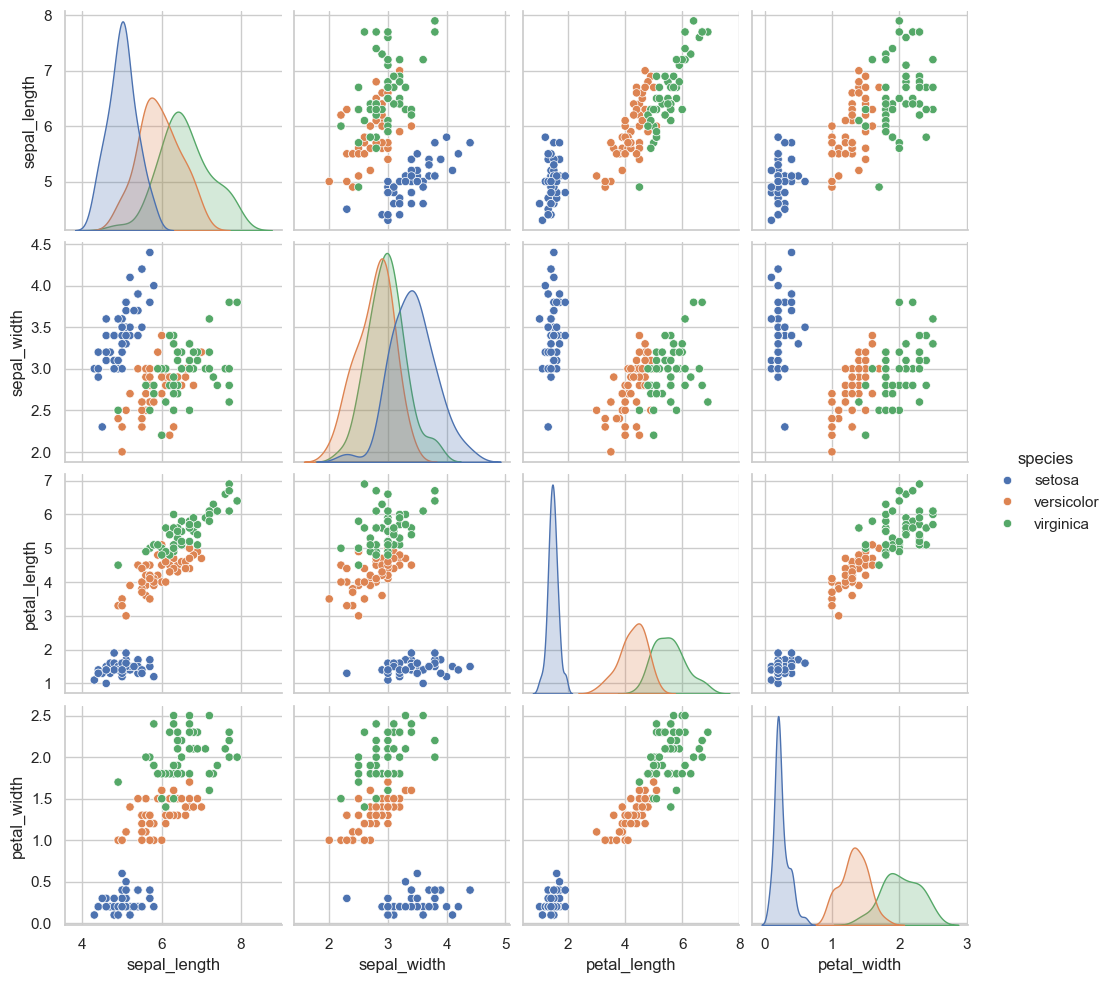

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
df = sns.load_dataset('iris')

sns.pairplot(data=df, hue='species')
plt.show()

- この結果から，setosaだけは簡単に分類できそうということがわかる